In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pickle


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix


In [8]:
df = pd.read_csv("spam.csv")

In [9]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=21)


In [11]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Evaluating Naive Bayes:
Accuracy: 0.95908111988514


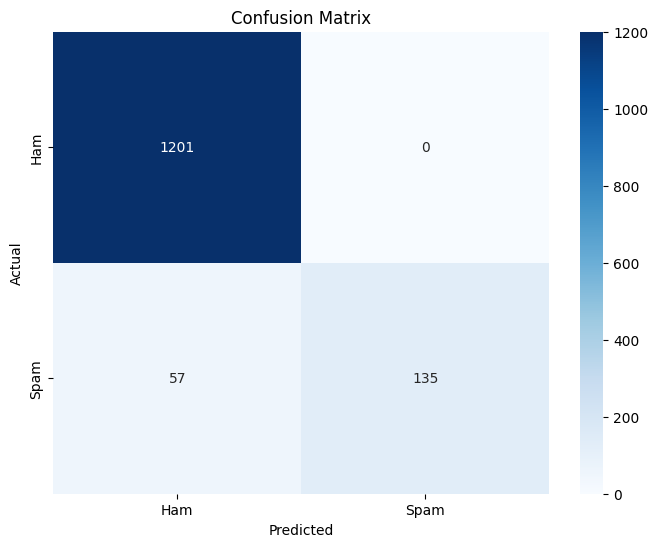

Evaluating Random Forest:
Accuracy: 0.9806173725771715


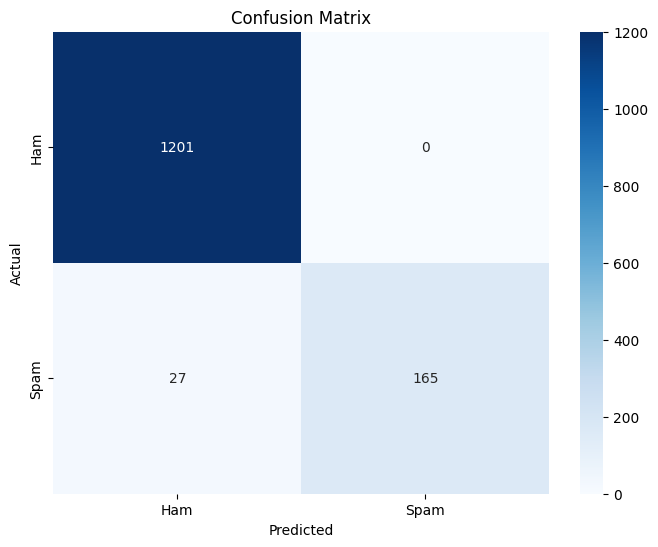

Evaluating Logistic Regression:
Accuracy: 0.9698492462311558


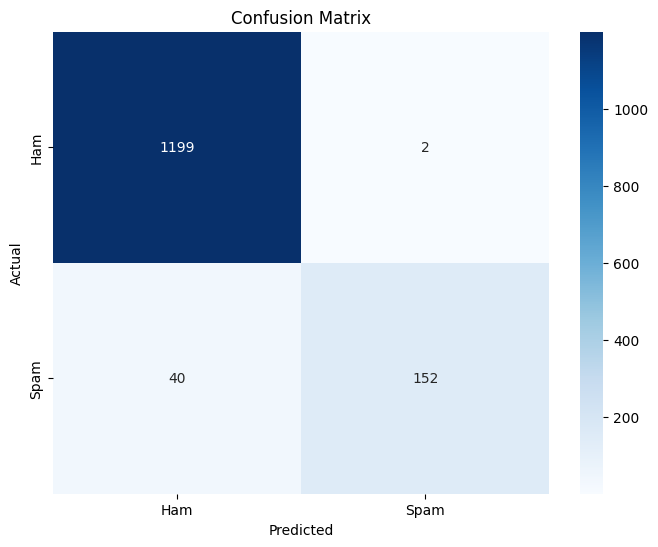

Evaluating Support Vector Machine:
Accuracy: 0.9834888729361091


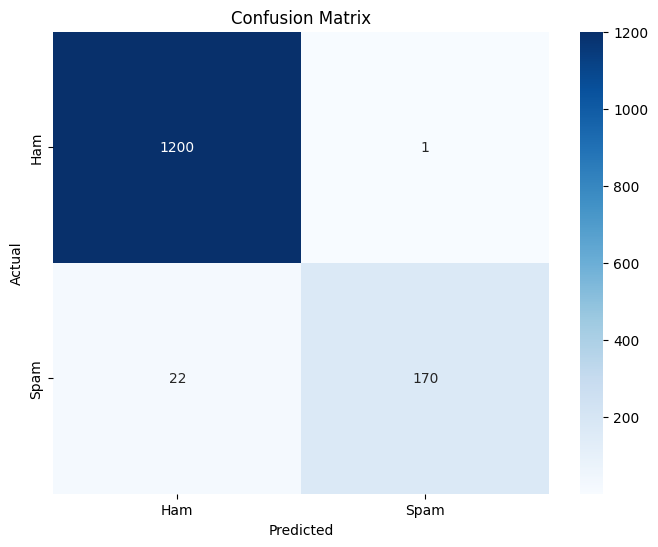

Evaluating Gradient Boosting:
Accuracy: 0.9698492462311558


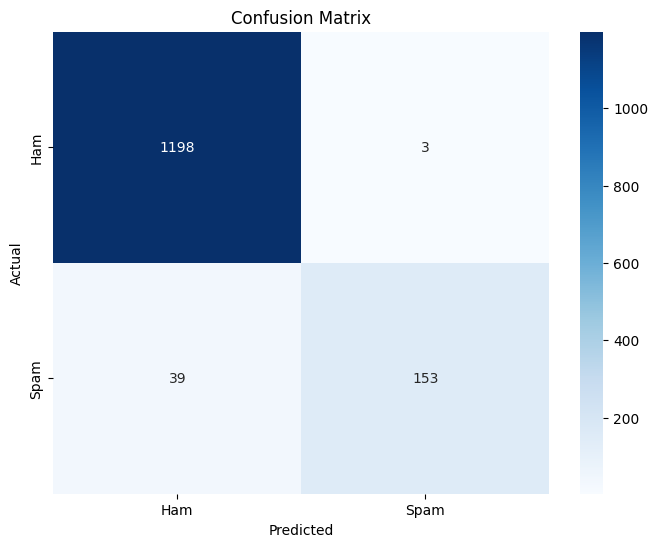

Evaluating Stochastic Gradient Descent:
Accuracy: 0.9899497487437185


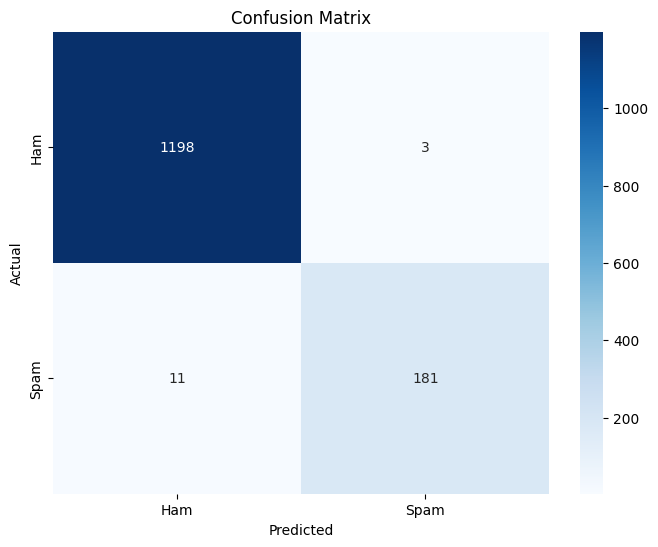

Evaluating K-Nearest Neighbors:
Accuracy: 0.9038047379755922


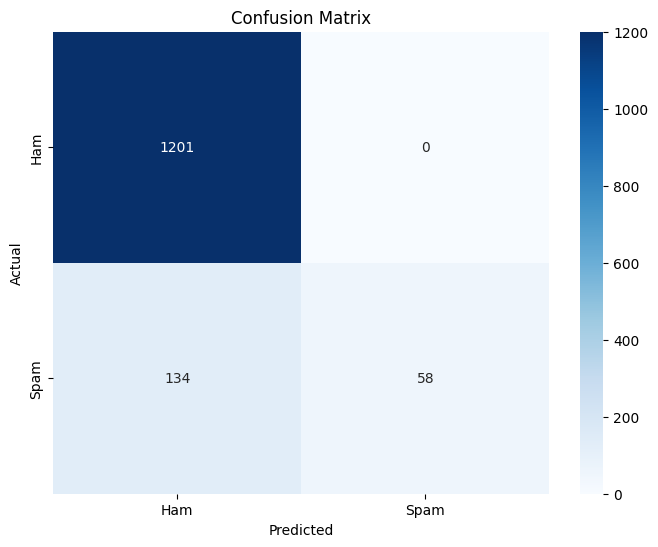

In [12]:
for name, clf in classifiers.items():
    print(f"Evaluating {name}:")
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('clf', clf)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"Accuracy: {score}")
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    pickle.dump(pipeline, open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb'))


In [64]:
emails = [
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

for name in classifiers.keys():
    print(f"Testing {name}:")
    model = pickle.load(open(f'{name.lower().replace(" ", "_")}_model.pkl', 'rb'))
    prediction = model.predict(emails)
    print(f"Predictions: {prediction}")

Testing Naive Bayes:
Predictions: [0 0]
Testing Random Forest:
Predictions: [0 1]
Testing Logistic Regression:
Predictions: [0 0]
Testing Support Vector Machine:
Predictions: [0 1]
Testing Gradient Boosting:
Predictions: [0 1]
Testing Stochastic Gradient Descent:
Predictions: [0 1]
Testing K-Nearest Neighbors:
Predictions: [0 0]


In [13]:

from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline


In [14]:

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=42)
base_classifiers = [
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression())
]
ensemble_model = VotingClassifier(estimators=base_classifiers, voting='soft')  # Soft voting for probabilities
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('ensemble', ensemble_model)
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('ensemble',
                 VotingClassifier(estimators=[('nb', MultinomialNB()),
                                              ('lr', LogisticRegression())],
                                  voting='soft'))])

In [15]:
score = pipeline.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {score}")



Ensemble Model Accuracy: 0.9899497487437185


In [16]:
pickle.dump(pipeline, open('ensemble_model.pkl', 'wb'))
emails = [
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

print("Testing Ensemble Model:")
model = pickle.load(open('ensemble_model.pkl', 'rb'))
prediction = model.predict(emails)
print(f"Predictions: {prediction}")

Testing Ensemble Model:
Predictions: [0 1]
